# Applying ML Model

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [70]:
train_data = pd.read_csv("../main_dataset/train_processed_data.csv")
train_data.shape

(874, 9)

In [71]:
x = train_data.drop(['Survived','PassengerId'],axis =1).values
y = train_data['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [72]:
from sklearn import metrics
def model_compare(model_name,model,y_test,y_pred,y_score, roc_auc = None):
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : roc_auc
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model_name] 
    return df_metrics

## DecisionTree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model_dt = DecisionTreeClassifier(random_state=303)
np.random.seed(303)
# start = time.time()
param_dist = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf':[100,200,70, 30],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30}


In [97]:
model_dt = DecisionTreeClassifier(random_state=303,
                                  max_depth=4, 
                                  criterion = 'gini', 
                                  min_samples_leaf=30 )
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8140200286123033
Testing score:  0.7885714285714286


In [98]:
y_pred = model_dt.predict(x_test)
# Model Accuracy
print (model_dt.score(x_test, y_test))

0.7885714285714286


In [99]:
y_pred = model_dt.predict(x_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_dt, tpr_dt)
y_score = accuracy_score(y_test, y_pred)
metrix_dt = model_compare("Decision Tree",model_dt, y_test, y_pred, y_score, roc_auc  )
metrix_dt

,Decision Tree
Accuracy,0.788571
Precision,0.902439
Recall,0.528571
F1 Score,0.666667
ROC AUC,0.745238


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf = RandomForestClassifier(random_state=303)

In [7]:
param_dist = {'max_depth': [3,4,5,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

KeyboardInterrupt: 

In [75]:
model_rf.set_params(criterion    = 'gini',
                    max_features = 'auto', 
                    max_depth    = 8,
                    bootstrap    = True
                   )

RandomForestClassifier(max_depth=8, random_state=303)

In [107]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 1000
max_estimators = 1500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

oob_series = pd.Series(error_rate)

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

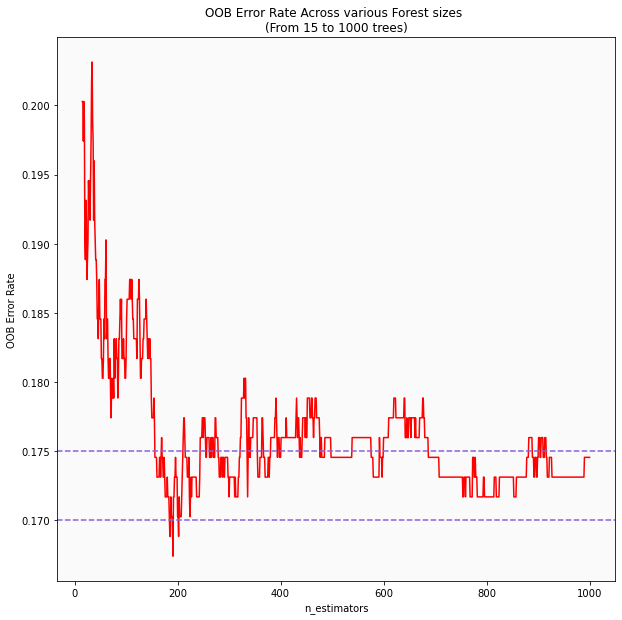

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.175, color='#875FDB',linestyle='--')
plt.axhline(0.170, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 1000 to 1500 trees)')

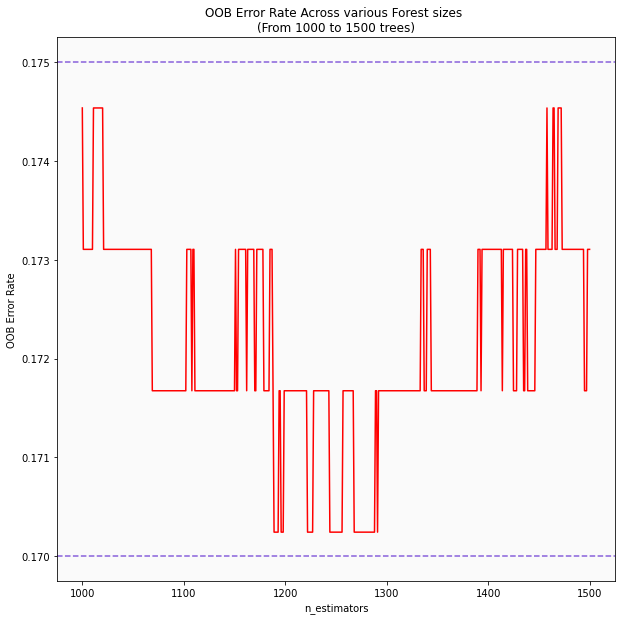

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.175, color='#875FDB',linestyle='--')
plt.axhline(0.170, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 1000 to 1500 trees)')

In [76]:
model_rf.set_params(n_estimators=750,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, n_estimators=750, random_state=303)

In [77]:
model_rf.fit(x_train, y_train)
prediction_test = model_rf.predict(x_test)
y_score= metrics.accuracy_score(y_test, prediction_test)
y_pred= model_rf.predict(x_test)
#########################################################
y_pred = model_rf.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_dt, tpr_dt)
#########################################################
metrix_rf = model_compare("Random Forest",model_rf, y_test, prediction_test, y_score , roc_auc_rf )
metrix_rf

,Random Forest
Accuracy,0.840000
Precision,0.888889
Recall,0.685714
F1 Score,0.774194
ROC AUC,0.856190


## Naive Bayes

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
model_nb = MultinomialNB().fit(x_train, y_train)
prediction_test = model_nb.predict(x_test)
y_score= metrics.accuracy_score(y_test, prediction_test)
y_pred= model_nb.predict(x_test)
y_pred = model_nb.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_dt, tpr_dt)
metrix_nb = model_compare("Naive Bayes",model_nb, y_test, prediction_test, y_score , roc_auc_rf )
metrix_nb

,Naive Bayes
Accuracy,0.697143
Precision,0.673469
Recall,0.471429
F1 Score,0.554622
ROC AUC,0.760884


## SVM

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [126]:
from sklearn.svm import SVC

In [127]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
model_svc= SVC()
model_svm = GridSearchCV(model_svc, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

0.7153209109730848
{'C': 0.9, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}


In [128]:
model_svc = SVC(kernel='poly',gamma=0.05, degree=3, C=0.9 )
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = model_svm.predict(x_test)
y_score = metrics.accuracy_score(y_test, y_pred)
#########################################################
# y_pred = model_svm.predict_proba(x_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_svm = auc(fpr_dt, tpr_dt)
#########################################################
metrix_svm = model_compare("SVM poly", model_svm, y_test, y_pred, y_score, roc_auc_svm )
metrix_svm

Accuracy Score:
0.7028571428571428


,SVM poly
Accuracy,0.697143
Precision,0.869565
Recall,0.285714
F1 Score,0.430108
ROC AUC,0.628571


In [129]:
metrics_bn_new = pd.concat([metrix_dt, metrix_rf, metrix_nb, metrix_svm], axis=1)
metrics_bn_new

,Decision Tree,Random Forest,Naive Bayes,SVM poly
Accuracy,0.788571,0.840000,0.697143,0.697143
Precision,0.902439,0.888889,0.673469,0.869565
Recall,0.528571,0.685714,0.471429,0.285714
F1 Score,0.666667,0.774194,0.554622,0.430108
ROC AUC,0.745238,0.856190,0.760884,0.628571


In [69]:
# metrics_bn = pd.concat([metrix_dt, metrix_rf, metrix_nb, metrix_svm], axis=1)
metrics_bn

,Decision Tree,Random Forest,Naive Bayes,SVM poly
Accuracy,0.794286,0.828571,0.697143,0.697143
Precision,0.854167,0.900000,0.654545,0.904762
Recall,0.585714,0.642857,0.514286,0.271429
F1 Score,0.694915,0.750000,0.576000,0.417582
ROC AUC,0.759524,0.859184,0.717007,0.626190


In [70]:
## By Looking at this all this model Random Forest is Giving you the Best Out 
## with respect to the ROC AUC CURVE , Recall, ..etc

In [58]:
final_model = RandomForestClassifier(random_state=303)

In [59]:
final_model.set_params(criterion    = 'gini',
                       max_features = 'auto', 
                       max_depth    = 8,
                       bootstrap    = True,
                       n_estimators=750,
                       warm_start=False, 
                       oob_score=False
                      )

RandomForestClassifier(max_depth=8, n_estimators=750, random_state=303)

In [60]:
x = train_data.drop(['Survived','PassengerId'],axis =1).values
y = train_data['Survived'].values

In [61]:
final_model.fit(x, y)

RandomForestClassifier(max_depth=8, n_estimators=750, random_state=303)

In [62]:
test_data = pd.read_csv("../main_dataset/test_processed_data.csv")

In [63]:
x_test = test_data.drop(['PassengerId'],axis =1).values

In [64]:
prediction_test = model_rf.predict(x_test)

In [65]:
prediction_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
test_data.insert(1,column="Survived",value=prediction_test)

In [67]:
test_data.drop([feature for feature in test_data.columns if feature not in ['PassengerId','Survived'] ],axis=1,inplace= True)

In [68]:
test_data.to_csv('../main_dataset/Test_predictions.csv',index=False)

In [141]:
test_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
